# PUM CLASS 3

Adam Jędrzejewski s20335

Import libs

In [155]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
# tych bibliotek używamy do wizualizacji naszych danych

import cufflinks as cf
# użyjemy jej do interaktywnego podlgądu danych

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# przyda nam się do stworzenia zbioru treningowego oraz testowego oraz zaimportowania modelu regresji

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# wykorzystamy do przedstawienia informacji składających się na jakość naszego modelu

%matplotlib inline

## 📚 Zadanie 1.
**Załaduj ponownie zbiór danych (DSP_6.csv), ale nie wykonuj jeszcze operacji na brakujących wartościach. Poszukaj innego sposobu wyświetlenia informacji o brakujących wartościach - wyświetl liczbę brakujących danych.**

**Reload dataset (DSP_6.csv) but do not operate on missing values yet. Look for another way to display information about missing values - display the number of missing data.**


In [156]:
train = pd.read_csv("DSP_6.csv")

Are there missing values?

In [157]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Number of missing values per column.

In [158]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total number of missing values.

In [159]:
train.isnull().sum().sum()

866

## 📚 Zadanie 2.
**Dodaj kilka kolejnych wykresów w celu dalszej eksploracji danych. Stwórz wykres, który będzie pokazywać informację dotyczącą liczby członków rodziny na pokładzie. Stwórz wykres, który będzie pokazywać informację dotyczącą opłaty, która została uiszczona przez pasażerów. Z uwagi na to, że dane te zawierają przypadki odstające zmień jego wielkość za pomocą parametru figsize.**

**Add more charts for further data exploration. Create a graph that will show information about the number of family members. Create a graph that will show information about the fare that has been paid by passengers. Since this data contains outliers, change its size using the figsize parameter.**


We are not droping missing values for this chart because age and cabin are not relevant to number of family members onboard. 

In [160]:
train_family_members = train.copy()
train_family_members['FamilyMembers'] = train_family_members['SibSp'] + train_family_members['Parch']

Number of family memebers onboard.

<AxesSubplot:xlabel='FamilyMembers', ylabel='count'>

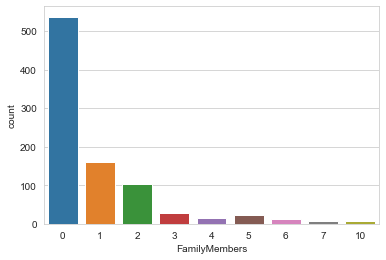

In [161]:
sns.set_style('whitegrid')
sns.countplot(x='FamilyMembers',data=train_family_members)

Fare paid by passegers.

<AxesSubplot:ylabel='Fare'>

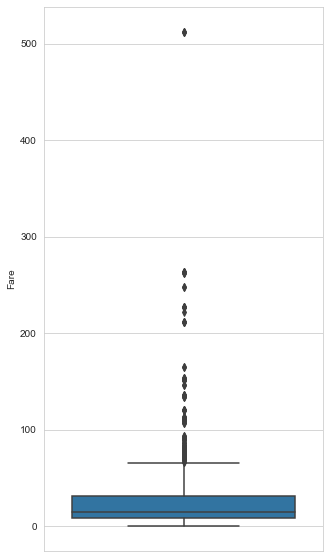

In [162]:
plt.figure(figsize=(5, 10))
sns.boxplot(y='Fare',data=train)

## 📚 Zadanie 3.
**Spróbuj wytrenować nowy model regresji logistycznej dla tych samych danych. Tym razem zrób wcześniej błąd i nie dokonuj transformacji zmiennych (po prostu załaduj data frame i spróbuj je zastosować do modelu). Jaki błąd otrzymujesz? Załaduj ponownie model, tym razem poprawnie, ale wytrenuj model dwukrotnie modyfikując wybrane hiperparametry (test_size, random_state lub max_iter). Czy coś się zmienia w parametrach modelu?**

**Train a new logistic regression model for the same data. This time, make a mistake and do not transform the variables (just load the data frame, and try to apply them to the model). What error do you see? Reload the model, this time correctly transform the variables, but train the model twice by modifying the selected hyperparameters (test_size, random_state or max_iter). Does anything change in the parameters of the model?**

In [163]:
df = pd.read_csv("DSP_6.csv")

In [164]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.10, 
                                                    random_state=101)

**We get type error**

In [166]:
# logmodel = LogisticRegression(max_iter = 500)
# logmodel.fit(X_train,y_train)
# predictions = logmodel.predict(X_test)

**ValueError: could not convert string to float: 'Flynn, Mr. John'**

Let's transform the data.

In [167]:
df = df.drop(['Cabin'], axis=1)

In [168]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [169]:
df = pd.concat([df, sex, embark], axis = 1)

In [170]:
df.drop(['Sex','Embarked','Name','Ticket', 'PassengerId'],axis=1,inplace=True)

In [171]:
df = df.fillna(df.mean())

In [172]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [173]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [174]:
X_df, X_test, y_df, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.15, 
                                                    random_state=32)

In [175]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_df,y_df)
predictions = logmodel.predict(X_test)

In [176]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        85
           1       0.72      0.67      0.69        49

    accuracy                           0.78       134
   macro avg       0.77      0.76      0.76       134
weighted avg       0.78      0.78      0.78       134



In [177]:
confusion_matrix(y_test, predictions)

array([[72, 13],
       [16, 33]], dtype=int64)

## 📚 Zadanie 4.
**Załaduj nowy zbiór danych DSP_2.csv. Wytrenuj nowy model regresji logistycznej w celu określenia czy u danej osoby wystąpi choroba serca (zmienna HeartDisease). Do wytrenowania modelu użyj wszystkich innych zmiennych, które występują w tym arkuszu. Czy model cechuje się dobrymi parametrami? Jeżeli tak, to dlaczego? Czy może zostać wykorzystany w praktyce?**

**Load the new dataset DSP_2.csv. Train a new logistic regression model to determine if somoeone will develop heart disease (the HeartDisease variable). Use all other variables in this dataset to train the model. Could this model be considered as good? Why?**

In [178]:
df_2 = pd.read_csv("DSP_2.csv")

In [179]:
df_2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [180]:
df_2.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [181]:
sex = pd.get_dummies(df_2['Sex'],drop_first=True)
chest_pain_type = pd.get_dummies(df_2['ChestPainType'],drop_first=True)
resting_ecg = pd.get_dummies(df_2['RestingECG'],drop_first=True)
exercise_angina = pd.get_dummies(df_2['ExerciseAngina'],drop_first=True)
st_slope = pd.get_dummies(df_2['ST_Slope'],drop_first=True)

In [182]:
df_2.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],axis=1,inplace=True)

In [183]:
df_2 = pd.concat([df_2, sex,
                  chest_pain_type, resting_ecg,
                  exercise_angina, st_slope], axis = 1)

In [184]:
df_2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [185]:
X_df, X_test_df, y_df, y_test_df = train_test_split(df_2.drop('HeartDisease',axis=1), 
                                                    df_2['HeartDisease'], test_size=0.50, 
                                                    random_state=101)

In [186]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_df,y_df)
predictions = logmodel.predict(X_test_df)

In [187]:
print(classification_report(y_test_df,predictions))


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       210
           1       0.85      0.89      0.87       249

    accuracy                           0.85       459
   macro avg       0.85      0.85      0.85       459
weighted avg       0.85      0.85      0.85       459



In [188]:
confusion_matrix(y_test_df, predictions)

array([[170,  40],
       [ 28, 221]], dtype=int64)

**With small numbers of iterations model fails to converege.**